In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
import cantera as ct

In [5]:
# def get_times(exp):
#     return np.array(sorted([float(i) for i in os.listdir(f"./{exp}/postProcessing/sampleDict/")]))

In [6]:
import os
import sys
from scipy.optimize import curve_fit
def lin_model(x, a, b):
    return x * a + b

In [34]:
def proc(offff):
    ts_str_ddof = sorted([i for i in os.listdir(offff) if i != "0"], key=lambda x: float(x))
    # ts_str_df = sorted([i for i in os.listdir(f"./home/vasily/Projects/tf_cfd_results/1cm/postProcessing/sampleDict/") if i != "0"], key=lambda x: float(x))

    ts = np.array(list(map(float, ts_str_ddof)))
    xs_ddof = np.zeros(len(ts))
    # xs_df = np.zeros(len(ts))
    for i in range(len(ts)):
        ddof_df = pd.read_csv(f"{offff}/{ts_str_ddof[i]}/data.csv")
        # df_df = pd.read_csv(f"./deepflame/postProcessing/sampleDict/{ts_str_df[i]}/data_T_H2_O2_H2O_N2_OH_HO2_p_rho.csv")
        # xs_df[i] = df_df["x"][df_df["OH"].argmax()]
        xs_ddof[i] = ddof_df["x"][ddof_df["OH"].argmax()]
    mask = (xs_ddof > 0.06) & (xs_ddof < 0.085)
    # xs_ddof[mask]
    (a, b), _ = curve_fit(lin_model, ts[mask], xs_ddof[mask])
    return a, ts, xs_ddof

In [35]:
offff = "/home/vasily/Projects/tf_cfd_results/2cm/postProcessing/sampleDict"

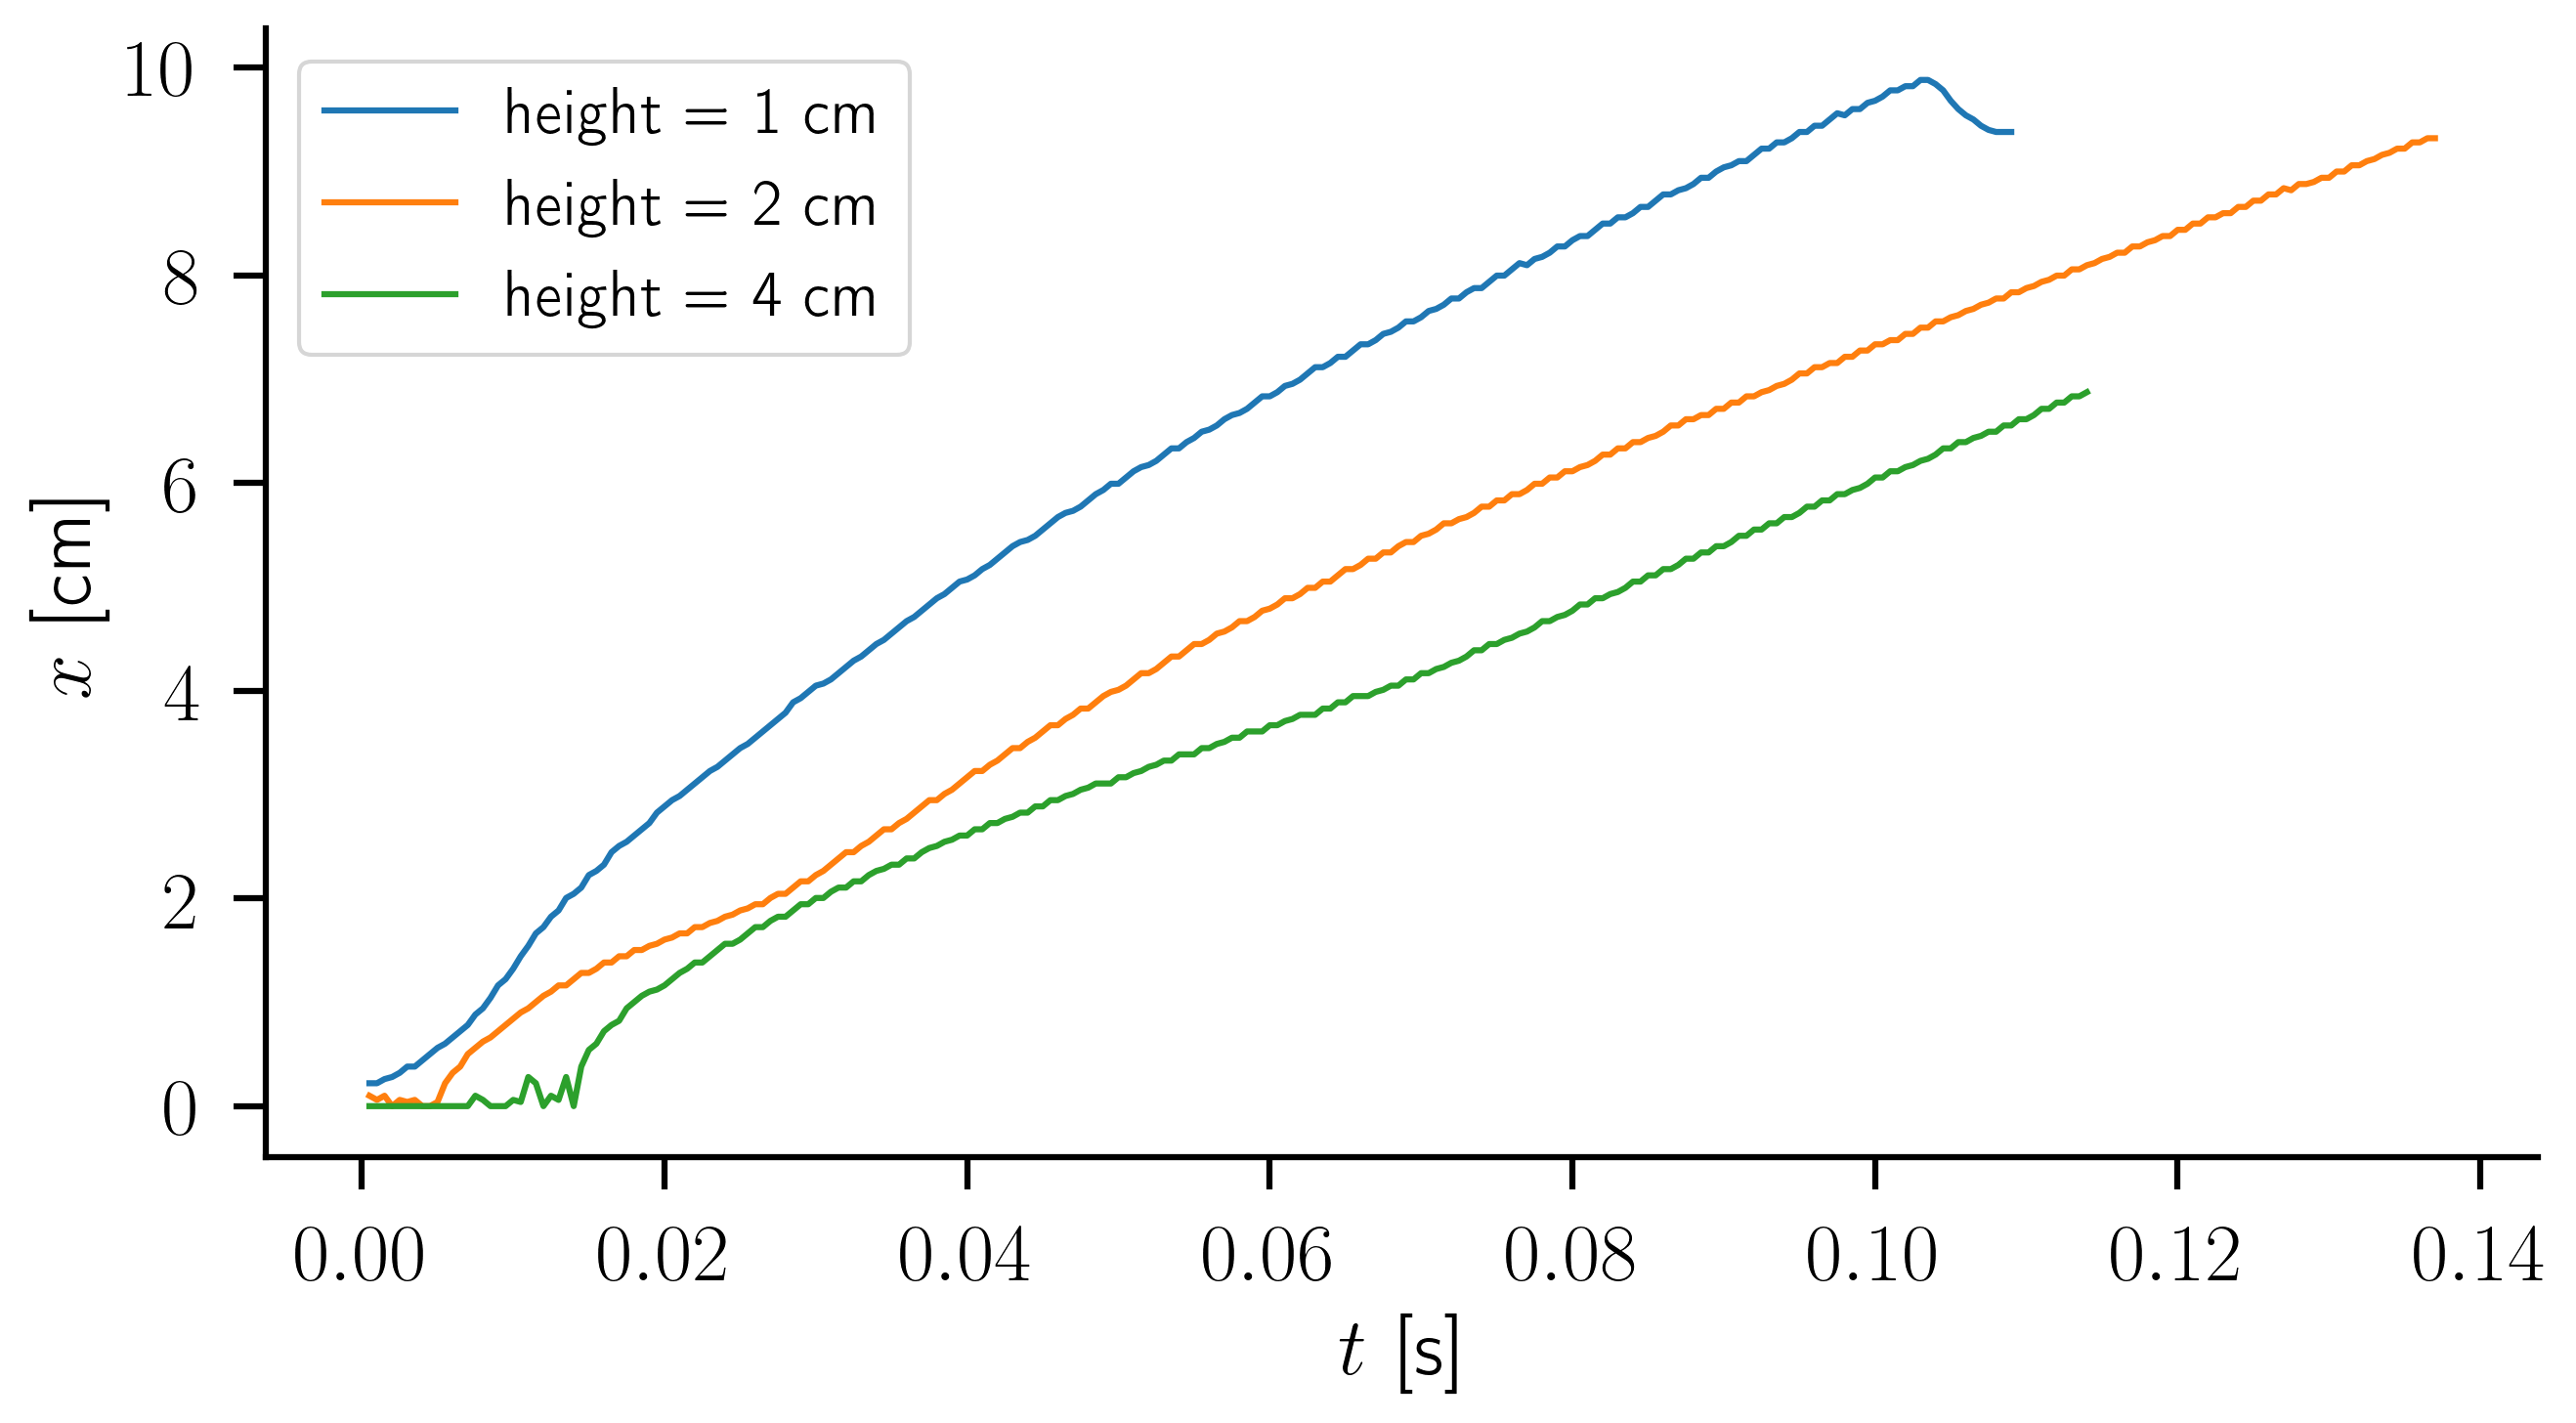

In [42]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [10, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)
plt.xlabel("$t$ [s]")
plt.ylabel("$x$ [cm]")
hs = []
vs = []
for h in [1, 2, 4]:
    v, ts, xs = proc(f"/home/vasily/Projects/tf_cfd_results/{h}cm/postProcessing/sampleDict")
    
    plt.plot(ts, xs*100, label=f"height = {h} cm") # 
    vs.append(v)
    hs.append(h)
plt.legend()
plt.savefig("x_fun_t_cfd.pdf", bbox_inches="tight")

# for h in [1]:
#     v = proc(f"/home/vasily/Projects/tf_cfd_results/{h}cm_cubic/postProcessing/sampleDict")
#     vs.append(v)
#     hs.append(h)

# proc("/home/vasily/Projects/tf_cfd_results/2cm/postProcessing/sampleDict")

In [44]:
def make_data(file_path):
    return pd.read_csv(
        file_path,
        sep=',',                # Ensure correct delimiter
        decimal='.',            # Handle decimal format
        encoding='utf-8',       # Adjust if needed
        skiprows=0          # Skip non-data header rows
    )

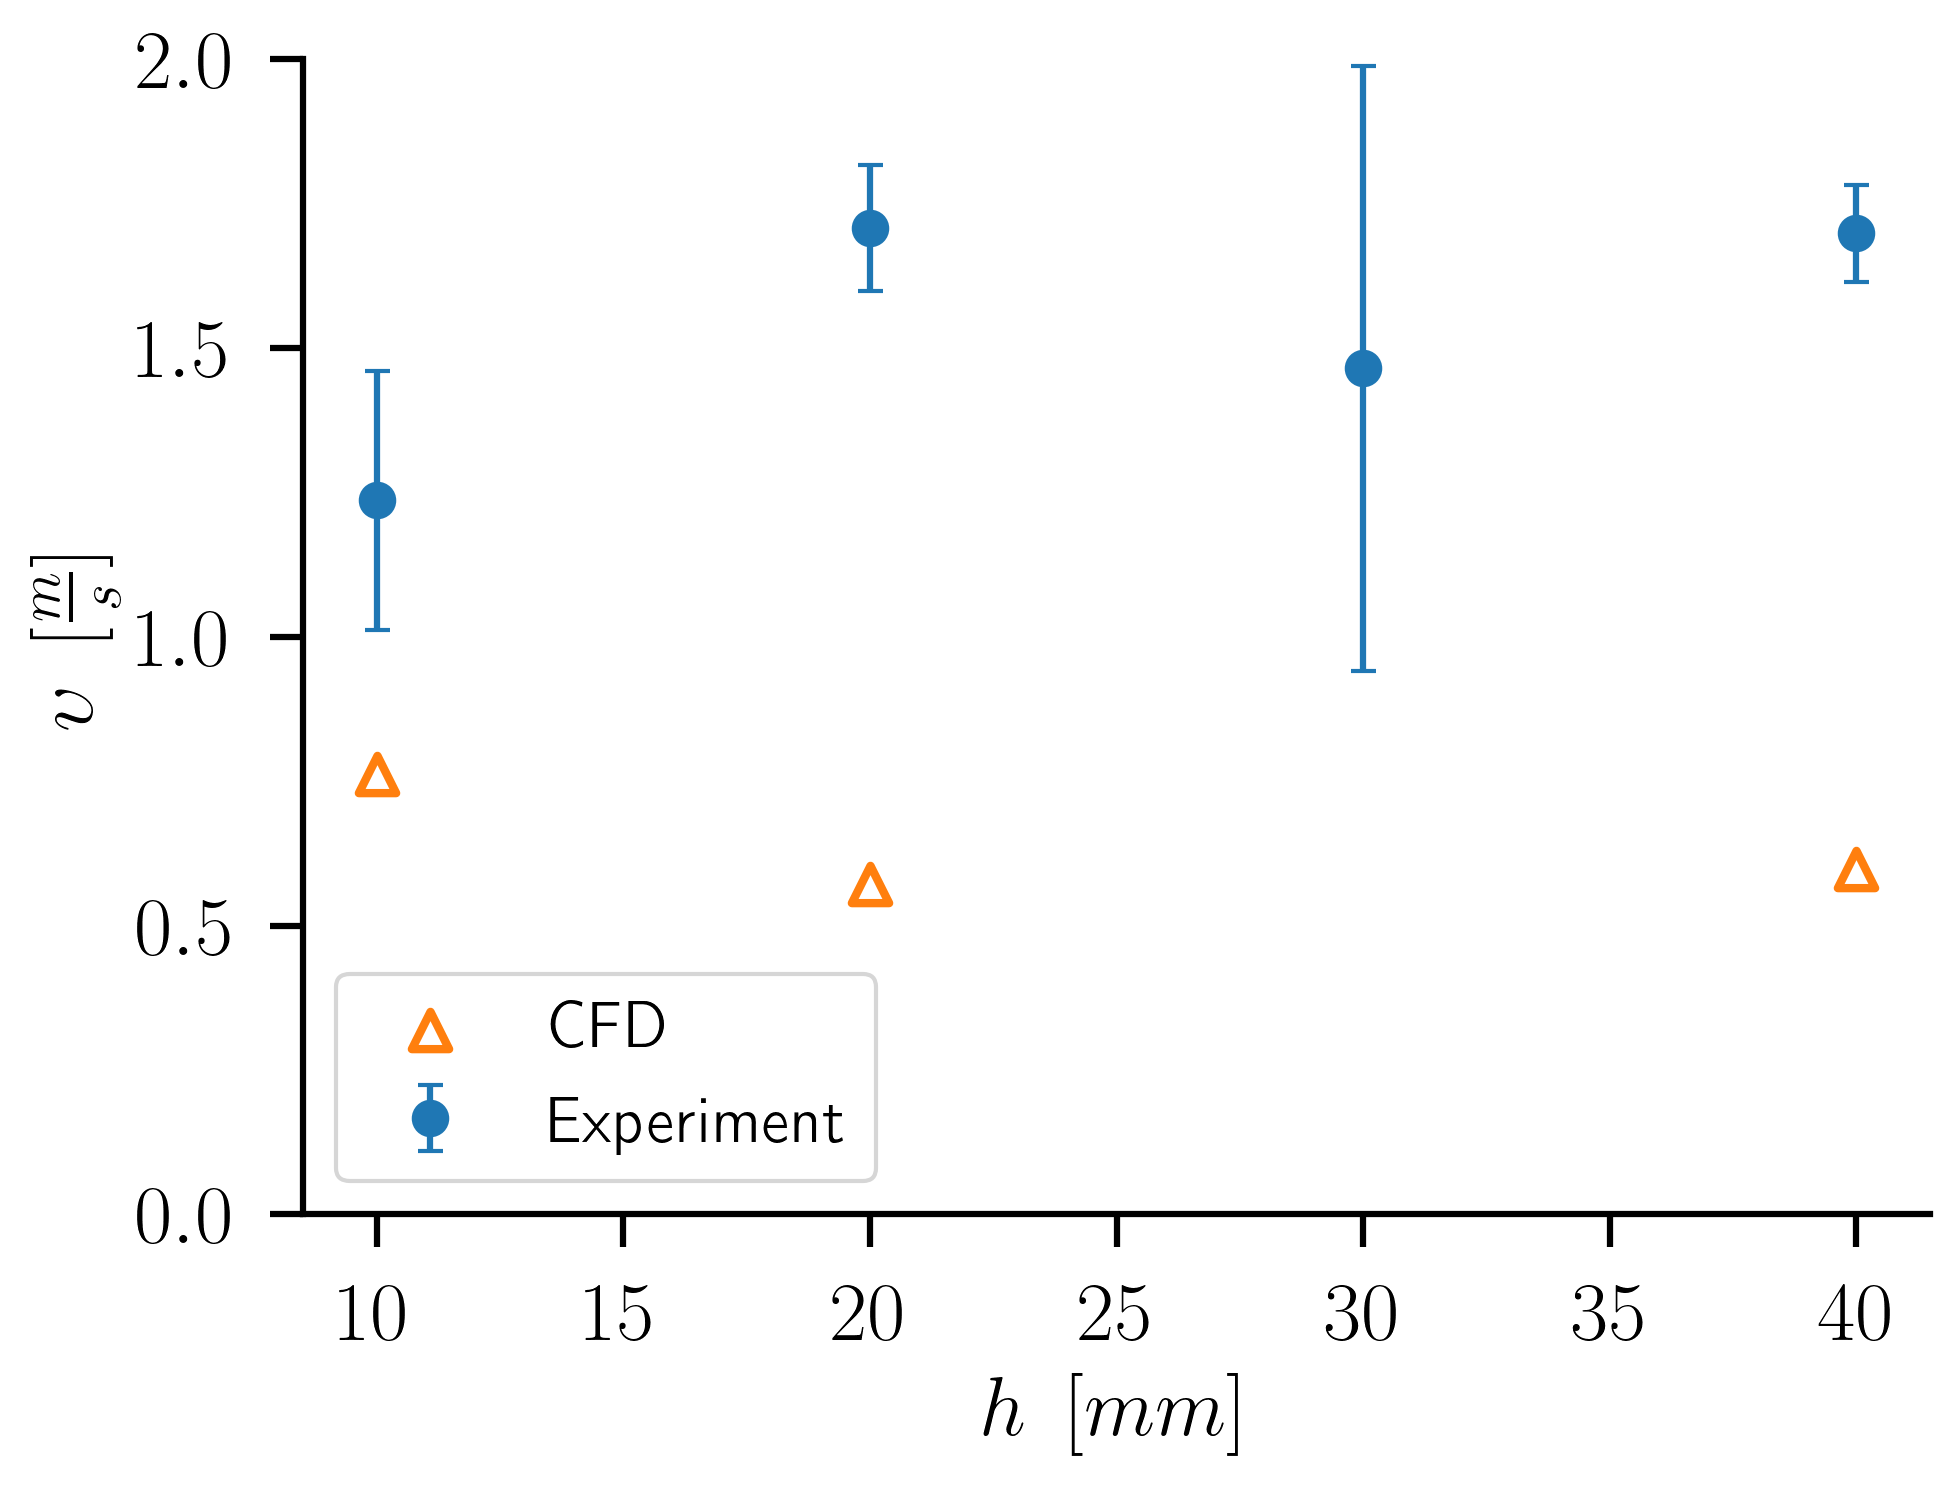

In [75]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [7, 5]
# plt.rc('font', family='Times New Roman')

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)

ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
ax_width = 1.5
ax.spines['left'].set_linewidth(ax_width)
ax.spines['bottom'].set_linewidth(ax_width)
ax.tick_params(axis='both', which='major', length=8, width=ax_width, direction='out', pad=8)
plt.xlabel("$h$ [cm]")
plt.ylabel("$v$ [m/s]")
# hs = []
# vs = []
data_height = make_data("../video_proc/exp_height_vs_velocity.csv")
data_height
height = data_height["height"].to_numpy()
velocity = data_height["mean_velocity"].to_numpy()
std_velocity = data_height["std_velocity"].to_numpy()

# print(std_velocity)
std_velocity[2] *= 8 / 3

plt.errorbar(height, velocity, std_velocity * 3, fmt="o", capsize=3, markersize=8, label="Experiment")

plt.scatter(np.array(hs)*10, vs, marker="^", s=80,edgecolors='tab:orange', c="white", linewidth=2, label="CFD")

plt.xticks([10, 15, 20, 25, 30, 35, 40])
plt.xlabel('$h\\:\\: [mm]$')
plt.ylabel('$\\upsilon\\:\\:[\\frac{m}{s}]$')

plt.ylim(0, 2)
plt.legend()
plt.savefig("v_fun_h_cfd.pdf", bbox_inches="tight")

# for h in [1]:
#     v = proc(f"/home/vasily/Projects/tf_cfd_results/{h}cm_cubic/postProcessing/sampleDict")
#     vs.append(v)
#     hs.append(h)

# proc("/home/vasily/Projects/tf_cfd_results/2cm/postProcessing/sampleDict")plt.scatter(hs, vs)

In [22]:
# ts_str_ddof = sorted([i for i in os.listdir(offff) if i != "0"], key=lambda x: float(x))
# # ts_str_df = sorted([i for i in os.listdir(f"./home/vasily/Projects/tf_cfd_results/1cm/postProcessing/sampleDict/") if i != "0"], key=lambda x: float(x))

# ts = np.array(list(map(float, ts_str_ddof)))
# xs_ddof = np.zeros(len(ts))
# # xs_df = np.zeros(len(ts))
# for i in range(len(ts)):
#     ddof_df = pd.read_csv(f"{offff}/{ts_str_ddof[i]}/data.csv")
#     # df_df = pd.read_csv(f"./deepflame/postProcessing/sampleDict/{ts_str_df[i]}/data_T_H2_O2_H2O_N2_OH_HO2_p_rho.csv")
#     # xs_df[i] = df_df["x"][df_df["OH"].argmax()]
#     xs_ddof[i] = ddof_df["x"][ddof_df["OH"].argmax()]

In [23]:
ddof_df = pd.read_csv(f"{offff}/0.0015/data.csv")
# df_df = pd.read_csv("./deepflame/postProcessing/sampleDict/0.0022/data_T_H2_O2_H2O_N2_OH_HO2_p_rho.csv")

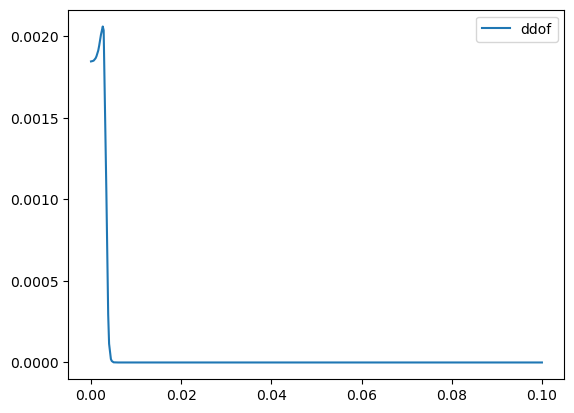

In [24]:
# plt.plot(df_df["x"]+0.00025, df_df["OH"], label="df")
plt.plot(ddof_df["x"], ddof_df["OH"], label="ddof")
plt.legend()

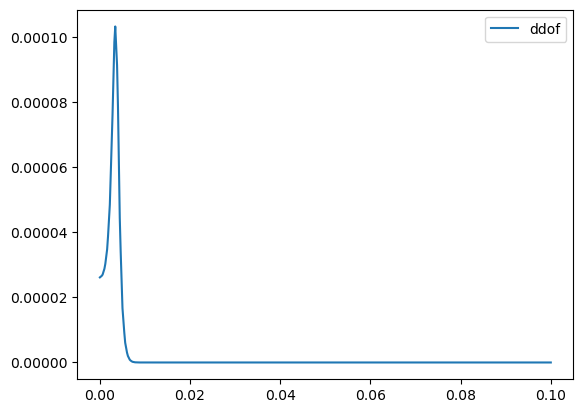

In [25]:
# plt.plot(df_df["x"]+0.00025, df_df["H2"], label="df")
plt.plot(ddof_df["x"], ddof_df["H2"], label="ddof")
plt.legend()

In [26]:
# # plt.plot(df_df["x"]+0.00025, df_df["H2O"], label="df")
# plt.plot(ddof_df["x"], ddof_df["H2O"], label="ddof")
# plt.legend()

In [27]:
# plt.plot(df_df["x"]+0.00025, df_df["T"], label="df")
# plt.plot(ddof_df["x"], ddof_df["T"], label="ddof")
# plt.legend()

In [28]:
# df_df["T"].max()

In [29]:
ddof_df["T"].max()

np.float64(1923.739)

In [52]:
mask = (xs_ddof > 0.04) & (xs_ddof < 0.09)
# xs_ddof[mask]

In [54]:
def lin_model(x, a, b):
    return x * a + b

In [56]:
a

np.float64(0.8216126761009027)

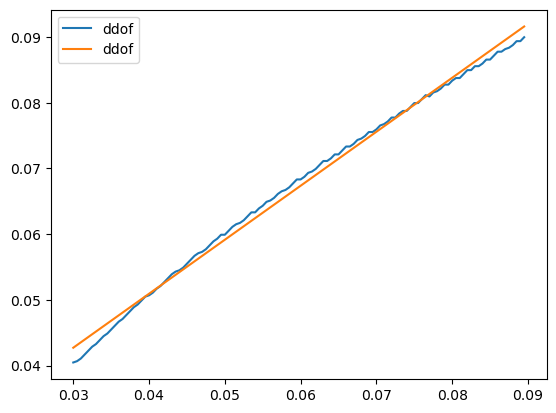

In [59]:
plt.plot(ts[mask], xs_ddof[mask], label="ddof")
plt.plot(ts[mask], lin_model(ts[mask], a, b), label="ddof")
# plt.plot(ts, xs_df, label="df")
plt.legend()

In [58]:
a

np.float64(0.8216126761009027)

In [145]:
# -(xs_df[-1] - xs_df[-5])/(ts[-1] - ts[-5])

2.613806902499999

In [146]:
gas = ct.Solution("mech.yaml")
gas.TPY = ddof_df["T"][0], ddof_df["p"][0], {"H2" : ddof_df["H2"][0], "O2" : ddof_df["O2"][0], "N2" : ddof_df["N2"][0]} 
f = ct.FreeFlame(gas, grid=np.linspace(0, 0.05, 30))
f.set_refine_criteria(ratio=3, slope=0.06, curve=0.10)
# f.transport_model = 'multicomponent' # optionally enable
# f.soret_enabled = True  # optionally enable
f.solve(loglevel=0, auto=True)
# # vel_list.append(f.velocity[0] * 100) # cm/s
# # f.save(file.split("/")[-1] + f".{j}.res.hdf")
f.velocity[0] * 100

257.40874577125834

In [147]:
(f.velocity[-1] - f.velocity[0])

14.902144542836062

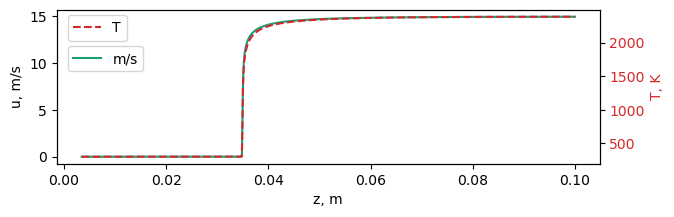

In [148]:
plt.style.use('default')

# mask = (f.grid > 0.015) & (f.grid < 0.021)
mask = f.grid > 0.00

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(7, 2))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('z, m')
spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('T, K', color=color)
ax1.plot(f.grid[mask], f.T[mask], color=color, linestyle='dashed', label="T")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('u, m/s', color=color) 

ax2.plot(f.grid[mask], f.velocity[mask] - f.velocity[mask][0], label="m/s")
ax2.legend(loc=(0.02, 0.6))
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)


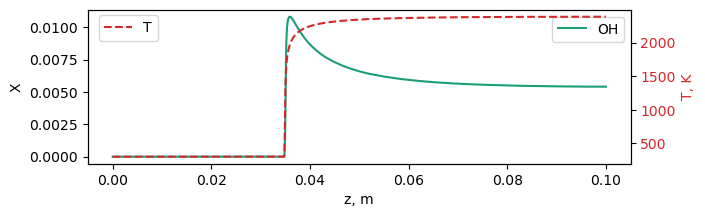

In [149]:
plt.style.use('default')

mask = (f.grid > -0.015)

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(7, 2))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('z, m')
spns = [
    # "O2", 
        # "H2", 
        "OH", 
        # "H2O"
        ]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('T, K', color=color)
ax1.plot(f.grid[mask], f.T[mask], color=color, linestyle='dashed', label="T")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('X', color=color) 
# ax2.set_color_cycle(sns.color_palette("coolwarm_r",num_lines))
# spis = [gas.species_index(i) for i in spns]
for i in spns:
    ax2.plot(f.grid[mask], f.Y[gas.species_index(i)][mask], label=i)
ax2.legend()
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)




In [150]:
f.T.max()

2384.1354796501914

In [151]:
f.Y

array([[ 2.85000000e-02,  2.85000000e-02,  2.85000000e-02, ...,
         1.06688355e-03,  1.06400320e-03,  1.06400320e-03],
       [ 1.57518746e-18,  3.93035355e-22,  4.13054393e-23, ...,
         7.09264552e-05,  7.05464414e-05,  7.05464414e-05],
       [ 1.30240242e-17,  1.19146019e-17,  1.09001481e-17, ...,
         4.54993722e-04,  4.52816878e-04,  4.52816878e-04],
       ...,
       [-1.12296113e-17,  3.05372849e-17,  3.49611546e-17, ...,
         2.08283089e-06,  2.07413572e-06,  2.07413572e-06],
       [ 1.50976124e-16,  1.50435574e-16,  1.50210942e-16, ...,
         2.17383508e-07,  2.16140063e-07,  2.16140063e-07],
       [ 7.43200000e-01,  7.43200000e-01,  7.43200000e-01, ...,
         7.43219772e-01,  7.43219782e-01,  7.43219782e-01]])